STEP 1: SORTING STUDENTS INTO CONCENTRATION AND DISTRACTION

In [ ]:
class Node:
    def __init__(self, data):
        self.data = data
        self.next = None

class LinkedList:
    def __init__(self):
        self.head = None

    def add_node(self, data):
        new_node = Node(data)
        if not self.head:
            self.head = new_node
        else:
            current = self.head
            while current.next:
                current = current.next
            current.next = new_node

    # Method to add a node to the end of the linked list
    def append(self, data):
        new_node = Node(data)
        if not self.head:
            self.head = new_node
            return

        current = self.head
        while current.next:
            current = current.next
        current.next = new_node

    def insert_in_order(self, data):
        new_node = Node(data)

        # If the list is empty or the new node's data is smaller than the head's data
        if self.head is None or data[2] < self.head.data[2]:
            new_node.next = self.head
            self.head = new_node
            return

        current = self.head
        while current.next is not None and current.next.data[2] < data[2]:
            current = current.next

        new_node.next = current.next
        current.next = new_node

    def get_length(self):
        length = 0
        current = self.head
        while current:
            length += 1
            current = current.next
        return length

    def delete_head(self):
        if self.head:
            self.head = self.head.next

    # Method to print the linked list
    def print_list(self):
        current = self.head
        while current:
            print(current.data, end=" -> ")
            current = current.next
        print("None")



#**20 students with 11001 simulations**

In [ ]:
import ast
import os
import random
import math
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

#Here Lamda is term related to concentration and Mu is term related to distraction
lamda=3
mu= 5
timestamp = 0

num_students = 50

C_LengthArray=[]
D_LengthArray=[]
# Create a linked list
C_Linkedlist = LinkedList()
D0_Linkedlist= LinkedList()
D1_Linkedlist= LinkedList()
D2_Linkedlist= LinkedList()

length_timestamp=[]

avg_conc_time=[]
avg_dist_time=[]

Distraction_list = []

#Generate a random number u
u=[0,1]

data0=[]
data2=[]
temp_Data=[]

new_array=[]

In [ ]:
modes_list = ["D0", "D1", "D2", "C"]
dist_modes_list = ["D0", "D1", "D2"]

dist_list_map = {
    "D0": 0,
    "D1": 1,
    "D2": 2
}

def insert_in_distraction_list_(data):
    if data[1] in dist_modes_list:
      list_number = dist_list_map[data[1]]
      Distraction_list[list_number].insert_in_order(data)
    else:
      list_number = random.randint(0, 2)
      Distraction_list[list_number].insert_in_order((data[0], "D"+str(list_number), data[2]))

def get_list_to_insert(student_data):
  # d0 d1 d2 C
  exclude = student_data[1]
  valid_list = [x for x in modes_list if x != exclude]
  return random.choice(valid_list)

def insert_in_distraction_list(student_data):
  # select anyone list randomly
  list_num = random.randint(0, 2)
  Distraction_list[list_num].insert_in_order(student_data)

def get_dist_list_index():
  # Find the minimum timestamp among the heads of the distraction lists
  min_timestamp = float('inf')  # Initialize with infinity
  min_list_index = -1

  for i in range(len(Distraction_list)):
    if Distraction_list[i].head is not None and Distraction_list[i].head.data[2] < min_timestamp:
      min_timestamp = Distraction_list[i].head.data[2]
      min_list_index = i
  return min_list_index

def remove_from_distraction_list():
  min_list_index = get_dist_list_index()

  # If a node with a minimum timestamp was found, remove it
  if min_list_index != -1:
    Distraction_list[min_list_index].delete_head()

In [ ]:
Distraction_list = [D0_Linkedlist, D1_Linkedlist, D2_Linkedlist]

#here j represents the number of iterations make it upto 10000
for j in range(0,11001):

    data_y=[]
    if j==0:
        #here we are getting concentration_array by getting distraction element
        for i in range(0,num_students):
            x=i
            data_y.append(x)
            y= (-1/lamda)*math.log(random.uniform(0, 1.0))
            data2.append((i,"C",y))
            data2.sort(key=lambda x: x[2])
        temp_Data=data2[:]


        for i in range(len(temp_Data)):
            C_Linkedlist.add_node(temp_Data[i])
        print("0",temp_Data)
        C_length=C_Linkedlist.get_length()
        C_LengthArray.append(C_length)
        D_LengthArray.append(num_students-C_length)

        length_timestamp.append(("t%s"%j, C_Linkedlist.get_length(), timestamp)) # here timestamp should be 0

    else:
        list_to_insert = get_list_to_insert(temp_Data[0])
        if list_to_insert == "C" and C_Linkedlist.get_length() < num_students:
            #generate a random number
            rand_d= (-1/lamda)*math.log(random.uniform(0, 1.0))
            avg_conc_time.append(rand_d)
            remove_from_distraction_list()
            timestamp = temp_Data[0][2]
            t=temp_Data[0][2]+rand_d # time at which it leaves conc queue. temp_Data[0][2] is when it leaves distraction and t is when it leave concentration
            nam=temp_Data[0][0]
            temp_Data = temp_Data[1:]
            temp_Data.append((nam, "C", t))
            temp_Data.sort(key=lambda x:x[2])
            C_Linkedlist.insert_in_order((nam,"C",t))

        else:
            # if student goes in [d0 d1 d2] then it has can enter from [d0 d1 d2 C]
            rand_d=(-1/mu)*math.log(random.uniform(0, 1.0))
            avg_dist_time.append(rand_d)
            if temp_Data[0][1] == "C": # if student goes from C to [D0, D1, D2]
              C_Linkedlist.delete_head()
            else: # if student goes from D0/D1/D2 to D0/D1/D2
              remove_from_distraction_list()
            timestamp = temp_Data[0][2] # taking timestamp before it enters the other queue
            t=temp_Data[0][2]+rand_d
            nam=temp_Data[0][0]
            temp_Data = temp_Data[1:]
            temp_Data.append((nam, list_to_insert,t ))
            temp_Data.sort(key=lambda x:x[2])
            insert_in_distraction_list((nam,list_to_insert,t))
        if j>1000: # ignoring the first 1000 simulations
            C_length = C_Linkedlist.get_length()
            C_LengthArray.append(C_length)
            D_LengthArray.append(num_students-C_length)
            length_timestamp.append(("t%s"%j, C_length, round(timestamp, 6))) # no of students in concentration and timestamp


0 [(42, 'C', 0.0011786738034105688), (22, 'C', 0.009127014489251519), (35, 'C', 0.013369056494600903), (4, 'C', 0.016960449243301152), (47, 'C', 0.02141564068255117), (13, 'C', 0.026957416455414898), (20, 'C', 0.027449323660835655), (33, 'C', 0.027866412401786906), (16, 'C', 0.03148773262821102), (14, 'C', 0.03380152325758831), (43, 'C', 0.036222070443245206), (28, 'C', 0.036616464276663464), (6, 'C', 0.04036183378374176), (37, 'C', 0.04305815216942397), (7, 'C', 0.04722328227694992), (5, 'C', 0.07759180114710268), (27, 'C', 0.08080758475610345), (11, 'C', 0.10828275115236725), (17, 'C', 0.12577322276749184), (10, 'C', 0.15228210612048534), (44, 'C', 0.1540793396169953), (0, 'C', 0.1597431191111537), (19, 'C', 0.1831366438661559), (38, 'C', 0.2014815024140476), (15, 'C', 0.2050435751219213), (21, 'C', 0.21008453710623282), (46, 'C', 0.24293700455164127), (40, 'C', 0.2531852909613217), (41, 'C', 0.2624200839043337), (39, 'C', 0.265281437849341), (24, 'C', 0.2846235370737744), (31, 'C', 

In [ ]:
print(length_timestamp)

[('t0', 50, 0), ('t1001', 17, 4.843342), ('t1002', 17, 4.845991), ('t1003', 18, 4.848166), ('t1004', 18, 4.851608), ('t1005', 18, 4.85427), ('t1006', 18, 4.861304), ('t1007', 19, 4.867937), ('t1008', 18, 4.869212), ('t1009', 17, 4.87116), ('t1010', 17, 4.874423), ('t1011', 17, 4.878025), ('t1012', 18, 4.880994), ('t1013', 19, 4.883956), ('t1014', 18, 4.885171), ('t1015', 18, 4.887312), ('t1016', 18, 4.891137), ('t1017', 18, 4.918875), ('t1018', 19, 4.929105), ('t1019', 19, 4.930691), ('t1020', 19, 4.937186), ('t1021', 19, 4.938162), ('t1022', 20, 4.954213), ('t1023', 20, 4.957937), ('t1024', 20, 4.959353), ('t1025', 20, 4.963001), ('t1026', 19, 4.964517), ('t1027', 18, 4.974388), ('t1028', 18, 4.982711), ('t1029', 19, 4.984212), ('t1030', 18, 4.993513), ('t1031', 18, 5.000264), ('t1032', 18, 5.001265), ('t1033', 18, 5.004341), ('t1034', 17, 5.004636), ('t1035', 17, 5.006522), ('t1036', 17, 5.008918), ('t1037', 16, 5.013339), ('t1038', 17, 5.01376), ('t1039', 17, 5.014912), ('t1040', 17

In [ ]:
len(length_timestamp)

10001

In [ ]:
_50_students = int(num_students * 0.5)
_40_students = _50_students -1
_60_students = _50_students + 1
print(_50_students, _40_students, _60_students)

25 24 26


In [ ]:
df_length_without_break = pd.DataFrame({
    'lengh_timestamp_without_break': length_timestamp,
})
df_length_without_break

# filename = f"timestamp_without_break_{num_students}_students.txt"
# df_length_without_break.to_csv(filename, sep='\t',index=False)

,lengh_timestamp_without_break
0,"(t0, 50, 0)"
1,"(t1001, 17, 4.843342)"
2,"(t1002, 17, 4.845991)"
3,"(t1003, 18, 4.848166)"
4,"(t1004, 18, 4.851608)"
...,...
9996,"(t10996, 16, 52.349415)"
9997,"(t10997, 15, 52.35896)"
9998,"(t10998, 15, 52.377758)"
9999,"(t10999, 15, 52.388636)"


In [ ]:
# df_length_without_break = pd.read_csv(filename, sep='\t')
# df_length_without_break

In [ ]:
timestamp_list_ = df_length_without_break['lengh_timestamp_without_break'].to_list()

timestamp_list = [eval(str(item)) for item in timestamp_list_]
# timestamp_list

# STEP 2: FINDING TIMESTAMPS

In [ ]:
timestamp_50_50 =[]
timestamps_40_60_to_50_50 = []
timestamps_60_40_to_50_50 = []
timestamps_50_50_to_40_60 = []
timestamps_50_50_to_60_40 = []
only_timestamps = []

# Percentage of students
_50_students = int(num_students * 0.5)
_40_students = _50_students -1
_60_students = _50_students + 1


total_timestamps = len(timestamp_list)
for j in range(total_timestamps):
      only_timestamps.append(timestamp_list[j][2])
      if timestamp_list[j][1] == _50_students :
          timestamp_50_50.append((timestamp_list[j][2]))

          if timestamp_list[j-1][1] == _40_students and j > 0:
              timestamps_40_60_to_50_50.append(timestamp_list[j][2])

          elif timestamp_list[j-1][1] == _60_students and j > 0:
              timestamps_60_40_to_50_50.append(timestamp_list[j][2])

          if j < total_timestamps-1 and timestamp_list[j+1][1] == _40_students :
              timestamps_50_50_to_40_60.append(timestamp_list[j+1][2])

          elif j < total_timestamps-1 and timestamp_list[j+1][1] == _60_students:
              timestamps_50_50_to_60_40.append(timestamp_list[j+1][2])

In [ ]:
print(len(timestamp_list))
print("C_LengthArray", C_LengthArray)
print("D_LengthArray", D_LengthArray)
print("All Timestamps:", only_timestamps)
print("Class is at 50,50:", timestamp_50_50)
print("Class is at 40,60 to 50,50:", timestamps_40_60_to_50_50) # 0
print("Class is at 60,40 to 50,50:", timestamps_60_40_to_50_50) # 1
print("Class is at 50,50 to 40,60:", timestamps_50_50_to_40_60) # 2
print("Class is at 50,50 to 60,40:", timestamps_50_50_to_60_40) # 3

10001
C_LengthArray [50, 17, 17, 18, 18, 18, 18, 19, 18, 17, 17, 17, 18, 19, 18, 18, 18, 18, 19, 19, 19, 19, 20, 20, 20, 20, 19, 18, 18, 19, 18, 18, 18, 18, 17, 17, 17, 16, 17, 17, 17, 17, 17, 17, 18, 18, 17, 16, 16, 17, 16, 16, 16, 17, 17, 18, 19, 20, 19, 18, 19, 20, 21, 22, 22, 22, 23, 24, 23, 23, 23, 23, 23, 22, 23, 22, 22, 21, 21, 20, 20, 20, 20, 20, 19, 19, 18, 18, 19, 20, 20, 21, 21, 21, 22, 23, 24, 25, 25, 25, 26, 26, 25, 25, 25, 26, 25, 26, 26, 27, 26, 26, 25, 24, 24, 23, 22, 22, 22, 22, 22, 21, 21, 21, 21, 22, 21, 20, 21, 20, 21, 21, 21, 20, 21, 20, 19, 20, 21, 21, 20, 20, 19, 19, 19, 19, 19, 20, 20, 19, 18, 17, 16, 16, 15, 15, 15, 14, 14, 13, 13, 13, 13, 14, 14, 14, 13, 14, 14, 14, 15, 15, 15, 15, 14, 14, 14, 14, 15, 15, 16, 15, 15, 16, 17, 18, 18, 18, 18, 18, 19, 19, 18, 19, 19, 18, 17, 17, 17, 17, 17, 17, 18, 18, 17, 18, 18, 18, 18, 18, 18, 18, 19, 19, 20, 20, 20, 21, 22, 22, 22, 22, 22, 22, 22, 21, 22, 21, 22, 21, 20, 20, 21, 22, 21, 20, 19, 19, 19, 18, 19, 20, 19, 19, 20,

# STEP 3: FINDING INTERVALS

In [ ]:
import pandas as pd

# Create the initial DataFrame
df = pd.DataFrame(length_timestamp, columns=['Timestamp', 'Conc_Queue_Length', 'Time'])
df['Dist_Queue_Length'] = num_students - df['Conc_Queue_Length']

# Data for transition states
data = {
    '50,50': pd.Series(timestamp_50_50),
    '60,40 to 50,50': pd.Series(timestamps_60_40_to_50_50),
    '50,50 to 40,60': pd.Series(timestamps_50_50_to_40_60),
    '40,60 to 50,50': pd.Series(timestamps_40_60_to_50_50),
    '50,50 to 60,40': pd.Series(timestamps_50_50_to_60_40)
}

df1 = pd.DataFrame(data)
df2 = df[['Timestamp', 'Time', 'Conc_Queue_Length', 'Dist_Queue_Length']]

df1['Interval of 50,50'] = df1['50,50'].diff()
df1['Interval of 60,40 to 50,50'] = df1['60,40 to 50,50'].diff()
df1['Interval of 50,50 to 60,40'] = df1['50,50 to 60,40'].diff()
interval_40_60_to_50_50 = df1['Interval of 40,60 to 50,50'] = df1['40,60 to 50,50'].diff()
interval_50_50_to_40_60 = df1['Interval of 50,50 to 40,60'] = df1['50,50 to 40,60'].diff()

df_final = pd.concat([df2, df1], axis=1)


# STEP 4 and 5: VALUES OF (LAMBDA & MU) and FINDING T1 and T2
T1 ~ exp(-1/lambda)

T2 ~ exp(-1/mu)

Pr(Coming Back to concentration) = 1-e^-((Average of interval_40_60_to_50_50 + Average of interval_50_50_to_40_60)/average distraction)

In [ ]:
#  Break duration is the [average of 5,5 to 4,6]
Break_Duration = interval_50_50_to_40_60.mean(skipna=True)
#  Break interval is the [average of 4,6 to 5,5]
Break_interval = interval_40_60_to_50_50.mean(skipna=True)


In [ ]:
# T1 = math.exp(-1 / lamda)  # T1 ~ exp(1/lambda)
# print('T1 ~ exp(1 / lamda):', round(T1,7))

T2 = math.exp(-1/mu) # T2 ~ exp(mu)
# print('T2 ~ exp(mu)): ', round(T2, 7))

# Average distraction time (before simulation) = 3; declared earlier
print("Average Distraction time before simulation, mu: ", mu)

Break_time = Break_Duration + Break_interval
print('Break time(T): ', round(Break_time, 7))
avg_dist_time = 1/mu

prob_without_breaks_ = 1 - math.exp(-(Break_time*avg_dist_time)) # Without Breaks.
print('Pr(Returning to concentration) = 1-e^-((1.5 + 2)/average distraction before break): ', round(prob_without_breaks_, 7))

prob_to_dist_without_breaks = 1 - math.exp(-(Break_Duration*avg_dist_time)) # Without Breaks. Distraction(lambda) = 5,5 to 4,6
print('Pr(Returning to distraction) = 1-e^-(lambda*T): ', round(prob_to_dist_without_breaks, 7))


Average Distraction time before simulation, mu:  5
Break time(T):  1.5131391
Pr(Returning to concentration) = 1-e^-((1.5 + 2)/average distraction before break):  0.261126
Pr(Returning to distraction) = 1-e^-(lambda*T):  0.1405888


In [ ]:
lambda_value = interval_50_50_to_40_60.mean(skipna=True)
mu_value = interval_40_60_to_50_50.mean(skipna=True)
print('Average of interval_40_60_to_50_50 (mu): ', round(mu_value, 7))
print('Average of interval_50_50_to_40_60 (lambda): ', round(lambda_value, 7))

Average of interval_40_60_to_50_50 (mu):  0.7556004
Average of interval_50_50_to_40_60 (lambda):  0.7575387


## Add 5+N students in concentration and 5-N in distraction

In [ ]:
def calculate_students_returning_to_conc_without_break():
  N=0
  # prob_dist_to_conc = prob_without_breaks_
  for i in range(0, num_students):
      u=random.uniform(0,1)
      if u < prob_without_breaks_:
          N = N+1
  return N

N = int(calculate_students_returning_to_conc_without_break()/2)
print("N =", N)

def calculate_students_going_to_dist_without_break():
  M = 0
  for i in range(0, num_students):
      u=random.uniform(0,1)
      if u < prob_to_dist_without_breaks:
          M = M+1
  return M

M = int(calculate_students_going_to_dist_without_break()/2)
print("M =", M)

conc_students = (_50_students+(N-M), _50_students-(N-M))
print("Concentration students (_50_students+(N-M), _50_students-(N-M):", conc_students)

M_count_without_break = [0]*(num_students+1)
M_values = []
for i in range(0, 11001):
  M_without_breaks = int((calculate_students_going_to_dist_without_break()))
  M_values.append(M_without_breaks)
  M_count_without_break[M_without_breaks] += 1

M_probablities_without_break = [prob / 11000 for prob in M_count_without_break]
Sum_probablities_without_break = sum(M_probablities_without_break)
print('Sum of probabilities before break: ' ,Sum_probablities_without_break)
print('M Values:', M_values)

N = 3
M = 2
Concentration students (_50_students+(N-M), _50_students-(N-M): (26, 24)
Sum of probabilities before break:  1.0000909090909091
M Values: [12, 9, 5, 11, 2, 5, 11, 6, 5, 6, 10, 7, 10, 5, 8, 9, 4, 8, 4, 9, 8, 5, 6, 5, 4, 4, 6, 7, 5, 4, 8, 9, 5, 7, 11, 5, 6, 11, 5, 11, 5, 9, 11, 6, 6, 11, 7, 11, 15, 10, 4, 8, 9, 4, 11, 10, 7, 11, 2, 5, 10, 6, 5, 9, 7, 5, 4, 11, 8, 13, 10, 4, 7, 6, 9, 4, 10, 4, 4, 9, 8, 7, 8, 6, 8, 9, 7, 6, 4, 8, 7, 10, 9, 8, 4, 6, 7, 12, 2, 6, 5, 4, 7, 6, 6, 5, 6, 7, 5, 3, 4, 9, 5, 10, 5, 9, 8, 8, 10, 9, 6, 4, 8, 11, 6, 13, 6, 4, 5, 8, 6, 10, 10, 4, 6, 9, 6, 2, 6, 7, 9, 7, 5, 6, 8, 9, 10, 2, 9, 7, 11, 8, 8, 6, 7, 10, 8, 6, 11, 13, 3, 5, 6, 10, 7, 7, 4, 11, 9, 2, 7, 8, 3, 2, 5, 11, 8, 9, 6, 12, 7, 3, 4, 6, 6, 7, 6, 7, 5, 4, 13, 7, 6, 10, 9, 4, 6, 7, 6, 9, 7, 6, 8, 5, 10, 11, 2, 7, 7, 8, 6, 7, 7, 10, 6, 6, 5, 7, 7, 6, 5, 5, 5, 6, 4, 3, 5, 4, 6, 5, 2, 6, 11, 10, 7, 2, 11, 4, 9, 5, 7, 5, 9, 6, 5, 8, 5, 7, 9, 5, 12, 12, 8, 5, 2, 10, 8, 7, 8, 10, 7, 9, 11, 5, 5, 7, 

####Calculating Probablity of students returning to Concentration before introducing breaks


In [ ]:
N_count_without_break = [0]*(num_students+1)
N_values = []
for i in range(0, 11001):
  N_without_breaks = int((calculate_students_returning_to_conc_without_break()))
  N_values.append(N_without_breaks)
  N_count_without_break[N_without_breaks] += 1

N_probablities_without_break = [prob / 11000 for prob in N_count_without_break]

Sum_probablities_without_break = sum(N_probablities_without_break)
print('Sum of probabilities before break: ' ,Sum_probablities_without_break)
print('N Values:', N_values)
df_without_breaks = pd.DataFrame({
    "Number of Students in Concentration": list(range(0, num_students+1)),
    # 'N_count_without_break': N_count_without_break,
    # 'N_probabilities_without_break': N_probablities_without_break
})
#df_without_breaks

Sum of probabilities before break:  1.000090909090909
N Values: [18, 12, 14, 7, 14, 20, 15, 15, 16, 10, 20, 7, 11, 9, 16, 11, 15, 14, 12, 13, 14, 13, 8, 19, 7, 12, 10, 14, 12, 12, 16, 9, 15, 11, 15, 14, 12, 11, 9, 14, 17, 13, 12, 11, 12, 10, 8, 13, 11, 9, 16, 13, 14, 12, 12, 8, 13, 16, 13, 9, 13, 13, 12, 16, 9, 8, 7, 19, 16, 13, 9, 12, 8, 13, 14, 10, 11, 13, 10, 11, 11, 10, 15, 16, 14, 11, 17, 15, 17, 11, 16, 12, 7, 19, 12, 8, 14, 12, 14, 13, 13, 9, 14, 14, 6, 16, 10, 13, 10, 16, 14, 13, 13, 14, 10, 13, 10, 8, 14, 14, 12, 15, 16, 12, 6, 14, 11, 8, 11, 18, 16, 12, 13, 17, 15, 12, 14, 12, 14, 12, 9, 13, 10, 14, 13, 15, 15, 10, 10, 11, 11, 20, 15, 9, 13, 13, 11, 17, 17, 8, 13, 10, 15, 7, 9, 5, 11, 11, 10, 18, 15, 12, 12, 15, 15, 9, 15, 16, 14, 15, 12, 18, 16, 13, 11, 7, 13, 18, 13, 13, 17, 14, 14, 15, 9, 10, 16, 16, 18, 9, 14, 16, 16, 14, 19, 13, 7, 15, 17, 16, 14, 17, 18, 12, 6, 13, 14, 12, 11, 11, 17, 13, 10, 10, 16, 12, 12, 12, 15, 12, 8, 14, 16, 14, 11, 14, 13, 19, 12, 16, 13, 11, 15,

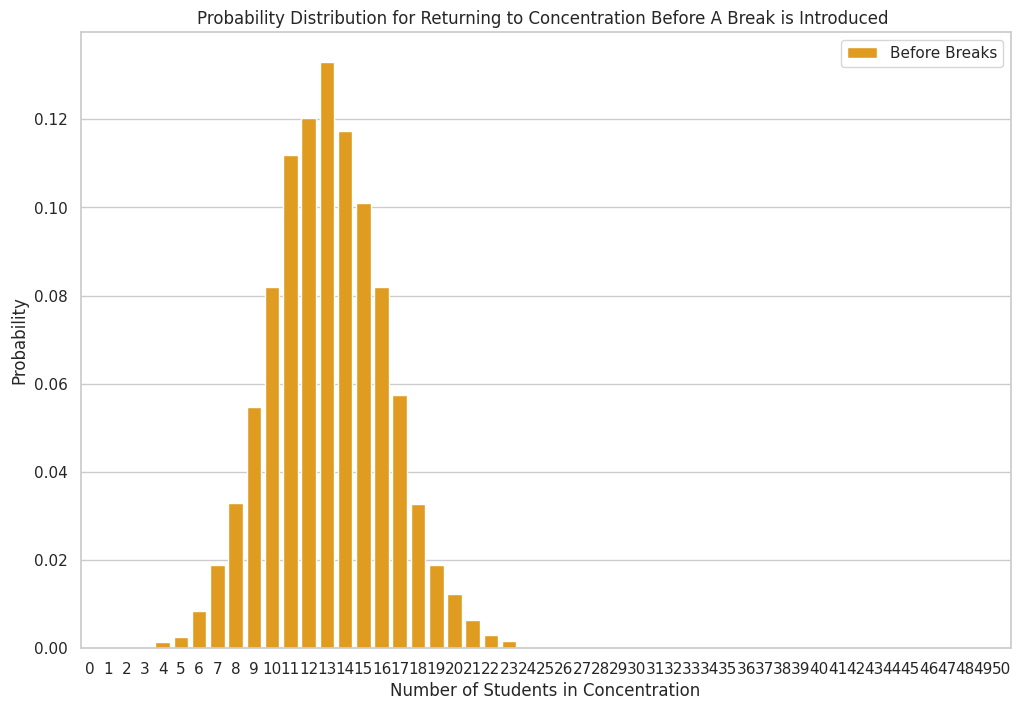

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 8))
number_of_students = list(range(len(N_probablities_without_break) + 1))


sns.barplot(x=list(range(len(N_probablities_without_break))), y=N_probablities_without_break, color='Orange',label="Before Breaks")
plt.xlabel('Number of Students in Concentration')

plt.ylabel('Probability')
plt.title('Probability Distribution for Returning to Concentration Before A Break is Introduced ')

plt.legend()
plt.axis()
plt.show()


# STEP 6: FINDING BINOMIAL DISTRIBUTION

In [ ]:
n = 5
p = prob_without_breaks_

def binomial(n, p):
    S = 0
    for index in range(1, _50_students):
        X = random.uniform(0,1)
        if X <= p:
            S += 1
    return S

In [ ]:
## Probability of number of students concentrating without Binomial

conc_without_break_no_binomial = [0]*(num_students+1)

for i in range(len(C_LengthArray)):
  conc_without_break_no_binomial[C_LengthArray[i]] +=1

prob_conc_without_break_no_binomial = [prob / 11000 for prob in conc_without_break_no_binomial]
print("Sum of probabilities", round(sum(prob_conc_without_break_no_binomial),3))

df_without_breaks = pd.DataFrame({
       "Number of Students in Concentration": list(range(0, num_students+1)),
       'Probability': prob_conc_without_break_no_binomial
   })

#df_without_breaks

Sum of probabilities 0.909


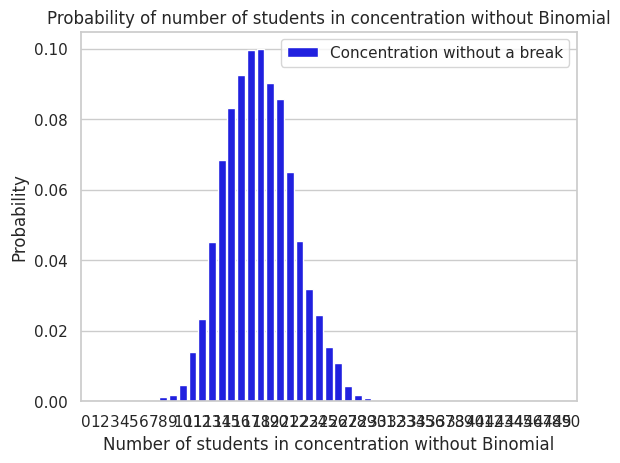

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

# Plot a lineplot using Seaborn
sns.barplot(x=range(len(prob_conc_without_break_no_binomial)), y=prob_conc_without_break_no_binomial, color='blue',label="Concentration without a break")

# Set labels and title
plt.xlabel('Number of students in concentration without Binomial')
plt.ylabel('Probability')
plt.title('Probability of number of students in concentration without Binomial')
plt.legend()
# Display the plot
plt.show()

# STEP 7: INTRODUCING BREAKS

In [ ]:
def check_and_introduce_break(C_length, C_Linkedlist_, Distraction_list, timestamp):

  D_length = num_students - C_length
  num_students_to_conc =  int(N-M + _50_students - C_length)
  num_students_to_conc = min(num_students_to_conc, D_length)  # Ensure not exceeding available students


  # (50% + N, 50% - N) add (50 + N - C_length)students to concentration from distraction
  #  updating all 't' in conc and dist linkedlist. Adding T2 to everyone
  for i in range(0, num_students_to_conc):
    Dist_list_index = get_dist_list_index()
    if Dist_list_index != -1 and Distraction_list[Dist_list_index].head is not None:
      temp_data = Distraction_list[Dist_list_index].head.data
      C_Linkedlist_.insert_in_order((temp_data[0], "C", temp_data[2]))
      Distraction_list[Dist_list_index].delete_head()

  current = C_Linkedlist_.head
  if current is not None:
    while current.next is not None:
      temp_data = current.data
      rand_d = (-1/mu)*math.log(random.uniform(0, 1.0))
      current.data = (temp_data[0], temp_data[1], timestamp + rand_d + T2)
      current = current.next

  for i in range(len(Distraction_list)):
    current =  Distraction_list[i].head
    if current is not None:
      while(current.next!=None):
        temp_data = current.data
        rand_d = (-1/lamda)*math.log(random.uniform(0, 1.0))
        current.data = (temp_data[0], temp_data[1], timestamp + rand_d + T2)
        current = current.next
      return

  else:
    return

In [ ]:
modes_list = ["D0", "D1", "D2", "C"]
dist_modes_list = ["D0", "D1", "D2"]

dist_list_map = {
    "D0": 0,
    "D1": 1,
    "D2": 2
}

def insert_in_distraction_list_(data):
    if data[1] in dist_modes_list:
      list_number = dist_list_map[data[1]]
      Distraction_list[list_number].insert_in_order(data)
    else:
      list_number = random.randint(0, 2)
      Distraction_list[list_number].insert_in_order((data[0], "D"+str(list_number), data[2]))

def get_list_to_insert(student_data):
  # d0 d1 d2 C
  exclude = student_data[1]
  valid_list = [x for x in modes_list if x != exclude]
  return random.choice(valid_list)

In [ ]:
lamda=3
mu= 5
timestamp = 0

# Initialize N
# N = 0
conc_students = (int(_50_students + N), int(_50_students - N))


C_LengthArray_=[]
D_LengthArray_=[]
# Create a linked list
C_Linkedlist_ = LinkedList()
D0_Linkedlist_= LinkedList()
D1_Linkedlist_= LinkedList()
D2_Linkedlist_= LinkedList()

Distraction_list = [D0_Linkedlist_, D1_Linkedlist_, D2_Linkedlist_]
distraction_levels = ["D0", "D1", "D2"]

length_timestamp_ = []

avg_conc_time_=[]
avg_dist_time_=[]

#Generate a random number u
u=[0,1]

data0_=[]
data2_=[]
temp_Data_=[]
new_array=[]


print("Concentration students:", conc_students)

for j in range(0, 10001):
    data_y_ = []
    if j == 0:
        # Adding 5 + N students to concentration queue
        for i in range(0, conc_students[0]):
            y = (-1 / lamda) * math.log(random.uniform(0, 1.0))
            data2_.append((i, "C", y))

        # Adding 5 - N students to distraction queue
        for i in range(conc_students[0], num_students):
            y = (-1 / mu) * math.log(random.uniform(0, 1.0))
            data2_.append((i, "D", y))

        data2_.sort(key=lambda x: x[2])
        temp_Data_ = data2_[:]

        for i in range(len(temp_Data_)):
            if temp_Data_[i][1] == "C":
                C_Linkedlist_.add_node(temp_Data_[i])
            else:
                insert_in_distraction_list_(temp_Data_[i])

        C_length = C_Linkedlist_.get_length()
        C_LengthArray_.append(C_length)
        D_LengthArray_.append(num_students-C_length)
        length_timestamp_.append(("t%s" % j, C_length, timestamp))
# D0 D1 D2 C
    else:
        list_to_insert = get_list_to_insert(temp_Data_[0])
        if list_to_insert == "C" and C_Linkedlist_.get_length() < num_students:
            rand_d = (-1 / lamda) * math.log(random.uniform(0, 1.0))
            avg_conc_time_.append(rand_d)
            remove_from_distraction_list()
            timestamp = temp_Data_[0][2]
            t = temp_Data_[0][2] + rand_d
            nam = temp_Data_[0][0]
            temp_Data_ = temp_Data_[1:]
            temp_Data_.append((nam, "C", t))
            temp_Data_.sort(key=lambda x: x[2])
            C_Linkedlist_.insert_in_order((nam, "C", t))

        else:
          # if student goes in [d0 d1 d2] then it has can enter from [d0 d1 d2 C]
            rand_d = (-1 / mu) * math.log(random.uniform(0, 1.0))
            avg_dist_time_.append(rand_d)
            if temp_Data_[0][1] == "C": # if student goes from C to [D0, D1, D2]
              C_Linkedlist_.delete_head()
            else: # if student goes from D0/D1/D2 to D0/D1/D2
              remove_from_distraction_list()
            timestamp = temp_Data_[0][2]
            t = temp_Data_[0][2] + rand_d
            nam = temp_Data_[0][0]
            temp_Data_ = temp_Data_[1:]
            temp_Data_.append((nam, list_to_insert, t))
            temp_Data_.sort(key=lambda x: x[2])
            insert_in_distraction_list_((nam, list_to_insert, t))

        C_length = C_Linkedlist_.get_length()
        C_LengthArray_.append(C_length)
        D_LengthArray_.append(num_students-C_length)
        length_timestamp_.append(("t%s" % j, C_length, round(timestamp, 4)))

        # Introducing breaks
        if C_length <= _50_students:
          check_and_introduce_break(C_length, C_Linkedlist_, Distraction_list, timestamp)
          C_length = C_Linkedlist_.get_length()
          C_LengthArray_.append(C_length)
          D_LengthArray_.append(num_students-C_length)
          length_timestamp_.append(("* t%s" % j, C_length, round(timestamp, 4)))
print("length_timestamp_", length_timestamp_)

Concentration students: (28, 22)
length_timestamp_ [('t0', 28, 0), ('t1', 28, 0.0098), ('t2', 28, 0.0135), ('t3', 28, 0.0153), ('t4', 29, 0.0158), ('t5', 28, 0.039), ('t6', 27, 0.0431), ('t7', 26, 0.052), ('t8', 27, 0.0533), ('t9', 26, 0.0598), ('t10', 26, 0.069), ('t11', 25, 0.0731), ('* t11', 26, 0.0731), ('t12', 26, 0.0754), ('t13', 26, 0.081), ('t14', 25, 0.0886), ('* t14', 26, 0.0886), ('t15', 26, 0.089), ('t16', 27, 0.0987), ('t17', 28, 0.1), ('t18', 28, 0.1065), ('t19', 28, 0.1188), ('t20', 29, 0.1217), ('t21', 28, 0.1244), ('t22', 27, 0.1328), ('t23', 27, 0.1358), ('t24', 28, 0.1413), ('t25', 27, 0.1454), ('t26', 26, 0.1521), ('t27', 26, 0.1576), ('t28', 26, 0.1586), ('t29', 26, 0.1593), ('t30', 26, 0.1612), ('t31', 26, 0.1644), ('t32', 26, 0.1645), ('t33', 27, 0.1701), ('t34', 27, 0.1827), ('t35', 27, 0.1853), ('t36', 28, 0.1897), ('t37', 29, 0.1901), ('t38', 28, 0.1965), ('t39', 28, 0.2003), ('t40', 29, 0.204), ('t41', 28, 0.2143), ('t42', 27, 0.2248), ('t43', 27, 0.2345), ('

In [ ]:
df_length_with_break = pd.DataFrame({
    'lengh_timestamp_with_break': length_timestamp_,
})
df_length_with_break

filename_ = f"timestamp_with_break_{num_students}_students.txt"
df_length_with_break.to_csv(filename_, sep='\t',index=False)


In [ ]:
df_length_with_break = pd.read_csv(filename_, sep='\t')
# df_length_with_break

In [ ]:
timestamp_list_break_ = df_length_with_break['lengh_timestamp_with_break'].to_list()

timestamp_list_break = [ast.literal_eval(item) for item in timestamp_list_break_]
# timestamp_list_break

In [ ]:
timestamp_50_50 =[]
timestamps_40_60_to_50_50 = []
timestamps_60_40_to_50_50 = []
timestamps_50_50_to_40_60 = []
timestamps_50_50_to_60_40 = []
only_timestamps = []

total_timestamps = len(timestamp_list_break)
for j in range(total_timestamps):
      only_timestamps.append(timestamp_list_break[j][2])
      if timestamp_list_break[j][1] == _50_students :
          timestamp_50_50.append((timestamp_list_break[j][2]))

          if timestamp_list_break[j-1][1] == _40_students and j > 0:
              timestamps_40_60_to_50_50.append(timestamp_list_break[j][2])

          elif timestamp_list_break[j-1][1] == _60_students and j > 0:
              timestamps_60_40_to_50_50.append(timestamp_list_break[j][2])

          if j < total_timestamps-1 and timestamp_list_break[j+1][1] == _40_students :
              timestamps_50_50_to_40_60.append(timestamp_list_break[j+1][2])

          elif j < total_timestamps-1 and timestamp_list_break[j+1][1] == _60_students:
              timestamps_50_50_to_60_40.append(timestamp_list_break[j+1][2])

In [ ]:
print(len(timestamp_list_break))
print("C_LengthArray", C_LengthArray_)
print("D_LengthArray", D_LengthArray_)
print("All Timestamps:", only_timestamps)
print("Class is at 5,5:", timestamp_50_50)
print("Class is at 40,60 to 50,50:", timestamps_40_60_to_50_50) # 0
print("Class is at 60,40 to 50,50:", timestamps_60_40_to_50_50) # 1
print("Class is at 50,50 to 40,60:", timestamps_50_50_to_40_60) # 2
print("Class is at 50,50 to 60,40:", timestamps_50_50_to_60_40) # 3

In [ ]:
import pandas as pd

# Create the initial DataFrame
df = pd.DataFrame(length_timestamp_, columns=['Timestamp', 'Conc_Queue_Length', 'Time'])
df['Dist_Queue_Length'] = num_students - df['Conc_Queue_Length']

# Data for transition states
data = {
    '50,50': pd.Series(timestamp_50_50),
    '60,40 to 50,50': pd.Series(timestamps_60_40_to_50_50),
    '50,50 to 40,60': pd.Series(timestamps_50_50_to_40_60),
    '40,60 to 50,50': pd.Series(timestamps_40_60_to_50_50),
    '50,50 to 60,40': pd.Series(timestamps_50_50_to_60_40)
}

df1 = pd.DataFrame(data)
df2 = df[['Timestamp', 'Time', 'Conc_Queue_Length', 'Dist_Queue_Length']]

df1['Interval of 50,50'] = df1['50,50'].diff()
df1['Interval of 60,40 to 50,50'] = df1['60,40 to 50,50'].diff()
df1['Interval of 50,50 to 60,40'] = df1['50,50 to 60,40'].diff()
interval_40_60_to_50_50 = df1['Interval of 40,60 to 50,50'] = df1['40,60 to 50,50'].diff()
interval_50_50_to_40_60 = df1['Interval of 50,50 to 40,60'] = df1['50,50 to 40,60'].diff()
interval_50_50_to_60_40 = df1['Interval of 50,50 to 60,40'] = df1['50,50 to 60,40'].diff()
interval_60_40_to_50_50 = df1['Interval of 60,40 to 50,50'] = df1['60,40 to 50,50'].diff()

df_final = pd.concat([df2, df1], axis=1)

In [ ]:
mu_value_ = interval_50_50_to_40_60.mean(skipna=True)
lambda_value = interval_50_50_to_60_40.mean(skipna=True)
avg_distraction = interval_60_40_to_50_50.mean(skipna=True)
print('Average of interval_40_60_to_50_50 (lambda): ', round(lambda_value, 7))
print('Average of interval_50_50_to_40_60 (mu): ', round(mu_value_, 7))
print('Average of interval_60_40_to_50_50 (avg dist): ', round(avg_distraction, 7))

Average of interval_40_60_to_50_50 (lambda):  1.7243647
Average of interval_50_50_to_40_60 (mu):  nan
Average of interval_60_40_to_50_50 (avg dist):  1.7243647


# STEP 8: FINDING PROBABILITY OF RETURNING TO CONC

In [ ]:
T1 = math.exp(1 / lambda_value)  # T1 = exp(-1/lambda)
T2 = math.exp(mu_value_) # T2 = exp(-1/mu)

# Average_Break_interval = T1 + T2

T = lambda_value + avg_distraction
mu2 = 1/avg_distraction
print("T: =", T)
print("mu2:", mu2)
prob_with_breaks_ = 1 - math.exp(-(T* mu2))
print('Probability of returning to conc after break: ', prob_with_breaks_)

prob_to_dist_with_breaks_ = 1 - math.exp(-(T*lambda_value))
print('Probability of returning to dist after break: ', prob_to_dist_with_breaks_)

T: = 3.448729411764706
mu2: 0.5799237229738489
Probability of returning to conc after break:  0.8646647167633873
Probability of returning to dist after break:  0.9973859833069567


In [ ]:
def calculate_students_returning_to_conc_with_breaks():
  N_=0

  for i in range(0,num_students):
      u=random.uniform(0,1)
      if u < prob_with_breaks_:
          N_ = N_+1
  return N_

N_ = int(calculate_students_returning_to_conc_with_breaks()/2)
print("N_ =", N_)

def calculate_students_going_to_dist_with_breaks():
  M_ = 0
  for i in range(0, num_students):
      u=random.uniform(0,1)
      if u < prob_to_dist_without_breaks:
          M_ = M+1
  return M_

M_ = int(calculate_students_going_to_dist_with_breaks()/2)
print("M =", M_)

conc_students = (_50_students+N_, _50_students-N_)

print("Concentration students:", conc_students)

N_ = 22
M = 1
Concentration students: (47, 3)


In [ ]:
N_count_with_breaks = [0]*(num_students+1)
N_values_with_breaks = []
M_count_with_breaks = [0]*(num_students+1)
M_values_with_breaks = []
for i in range(1, len(timestamp_list_break)):
  N_with_breaks = calculate_students_returning_to_conc_with_breaks()
  N_values_with_breaks.append(N_with_breaks)
  N_count_with_breaks[N_with_breaks] += 1
  NM_with_breaks = N_with_breaks - calculate_students_going_to_dist_with_breaks() # N-M values
  M_values_with_breaks.append(NM_with_breaks)
  M_count_with_breaks[NM_with_breaks] += 1

N_probablities_with_breaks = [prob / len(timestamp_list_break) for prob in N_count_with_breaks]
M_probablities_with_breaks = [prob / len(timestamp_list_break) for prob in M_count_with_breaks]

print("N values with break:\n", N_values_with_breaks)
print("N-M values with break:\n", M_values_with_breaks)

Sum_probablities_with_breaks = sum(N_probablities_with_breaks)
print('Sum of probablities with breaks: ', Sum_probablities_with_breaks)
Sum_M_probablities_with_breaks = sum(M_probablities_with_breaks)
print('Sum of M probablities with breaks: ', Sum_M_probablities_with_breaks)

df_with_breaks = pd.DataFrame({
    "Number of Students in Concentration": list(range(0, (num_students+1))),
    'M_probabilities_with_breaks': M_probablities_with_breaks,
    'N_count_with_breaks': N_count_with_breaks,
    'N_probabilities_with_breaks': N_probablities_with_breaks,
    'M_count_with_breaks': M_count_with_breaks,
})
df_with_breaks

df_combined = pd.merge(df_without_breaks, df_with_breaks, on="Number of Students in Concentration")
df_combined



# NAMING FILES ACCORDING TO THE STUDENT OF STUDENTS
# filename = f"results_{num_students}_students.csv"

# SAVING RESULTS IN CSV(.csv)
# df_combined.to_csv(filename, index=False)

# SAVING RESULTS IN TXT(.txt) FILE
# df_combined.to_csv('results.txt', sep='\t', index=False)

# filename = f"timestamp_results_{num_students}_students.txt"
# df_with_breaks.to_csv(filename, sep='\t',index=False)

# SAVING Timestamp RESULTS IN TXT(.txt) FILE
# df_with_breaks.to_csv('Timestamp_results.txt', sep='\t', index=False)

N values with break:
 [44, 41, 41, 46, 42, 40, 40, 43, 43, 46, 45, 40, 42, 44, 41, 44, 38, 41, 43, 42, 44, 42, 46, 43, 48, 46, 47, 44, 41, 44, 42, 42, 45, 42, 44, 47, 42, 42, 46, 46, 40, 46, 36, 40, 43, 43, 46, 43, 42, 46, 44, 41, 41, 47, 45, 43, 44, 41, 45, 49, 48, 40, 42, 45, 44, 41, 45, 46, 48, 39, 42, 44, 43, 42, 43, 40, 43, 43, 41, 44, 42, 43, 39, 41, 40, 44, 40, 43, 45, 45, 42, 46, 45, 42, 45, 38, 45, 43, 41, 43, 45, 41, 45, 43, 42, 44, 45, 44, 46, 37, 38, 45, 38, 46, 41, 40, 39, 40, 44, 46, 45, 38, 41, 39, 42, 42, 42, 46, 42, 39, 46, 45, 42, 45, 43, 49, 44, 41, 46, 43, 44, 46, 41, 46, 43, 44, 40, 46, 47, 38, 45, 38, 42, 41, 47, 45, 45, 46, 44, 45, 38, 39, 42, 40, 47, 44, 45, 42, 44, 42, 46, 44, 45, 44, 45, 47, 49, 44, 44, 42, 41, 42, 46, 40, 41, 43, 41, 43, 40, 41, 44, 41, 47, 45, 42, 44, 45, 43, 43, 48, 43, 42, 43, 43, 44, 42, 44, 45, 47, 41, 47, 43, 44, 43, 40, 44, 44, 42, 42, 44, 40, 45, 44, 47, 44, 43, 45, 40, 44, 44, 47, 40, 47, 44, 45, 43, 41, 44, 45, 41, 42, 45, 46, 45, 4

,Number of Students in Concentration,Probability,M_probabilities_with_breaks,N_count_with_breaks,N_probabilities_with_breaks,M_count_with_breaks
0,0,0.000000,0.000000,0,0.000000,0
1,1,0.000000,0.000000,0,0.000000,0
2,2,0.000000,0.000000,0,0.000000,0
3,3,0.000000,0.000000,0,0.000000,0
4,4,0.000000,0.000000,0,0.000000,0
5,5,0.000000,0.000000,0,0.000000,0
6,6,0.000000,0.000000,0,0.000000,0
7,7,0.000000,0.000000,0,0.000000,0
8,8,0.001182,0.000000,0,0.000000,0
9,9,0.001636,0.000000,0,0.000000,0


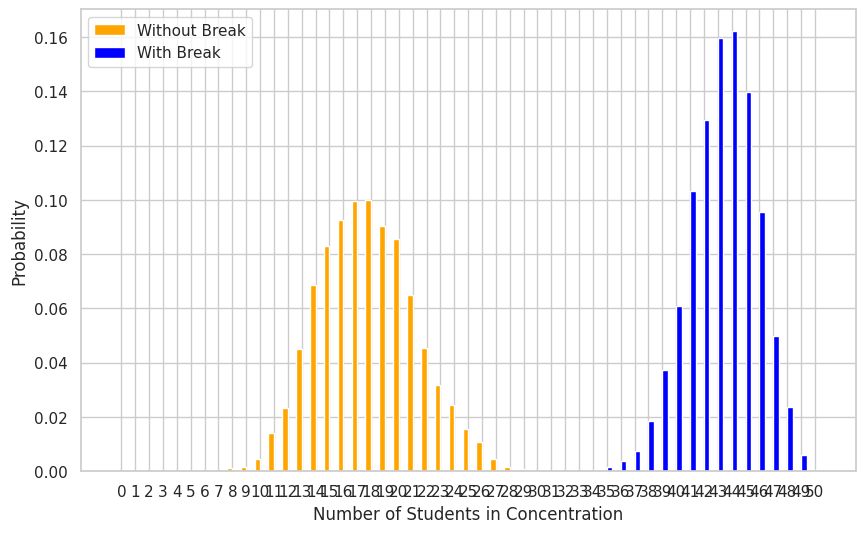

In [ ]:
import numpy as np

x = np.arange(len(N_probablities_with_breaks))
bar_width = 0.4
plt.figure(figsize=(10, 6))

plt.bar(x - bar_width / 2, prob_conc_without_break_no_binomial, width=bar_width, color='orange', label='Without Break')
plt.bar(x + bar_width / 2, N_probablities_with_breaks, width=bar_width, color='blue', label='With Break')

plt.xlabel('Number of Students in Concentration')
plt.ylabel('Probability')
plt.xticks(x, df_combined["Number of Students in Concentration"])
plt.legend()
plt.show()

#  50% students + N

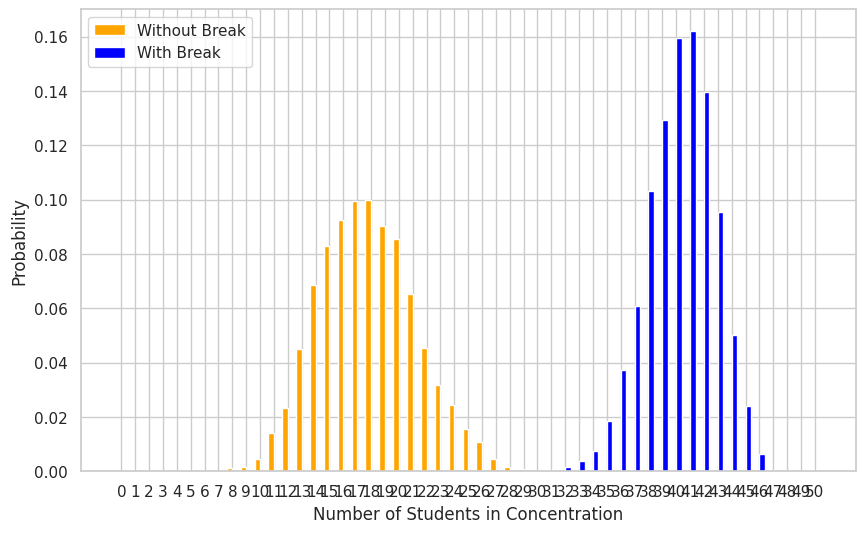

In [ ]:
import numpy as np

x = np.arange(len(N_probablities_with_breaks))
bar_width = 0.4
plt.figure(figsize=(10, 6))

plt.bar(x - bar_width / 2, prob_conc_without_break_no_binomial, width=bar_width, color='orange', label='Without Break')
plt.bar(x + bar_width / 2, M_probablities_with_breaks, width=bar_width, color='blue', label='With Break')

plt.xlabel('Number of Students in Concentration')
plt.ylabel('Probability')
plt.xticks(x, df_combined["Number of Students in Concentration"])
plt.legend()
plt.show()

# 50% students + N-M